In [43]:
from datetime import datetime
import pandas as pd
import numpy as np

In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import sys
sys.path.append('/home/ubertrader/Dropbox/tmqrexo/tmqrv')
sys.path.append('/home/ubertrader/Dropbox/tmqrexo/tmqrv/exobuilder/tests')

In [47]:
from exobuilder.contracts.futureschain import FuturesChain
from exobuilder.contracts.futurecontract import FutureContract
from exobuilder.tests.assetindexdict import AssetIndexDicts
from datetime import datetime, date
from exobuilder.contracts.instrument import Instrument
from exobuilder.data.datasource_mongo import DataSourceMongo
from exobuilder.data.assetindex_mongo import AssetIndexMongo
from exobuilder.data.exostorage import EXOStorage
from backtester.matlab import loaddata

## Initializing the data source

In [48]:
mongo_connstr = 'mongodb://localhost:27017/'
mongo_db_name = 'tmldb'

exostorage = EXOStorage(mongo_connstr, mongo_db_name)

## EXO Graph

In [49]:
exo = exostorage.load_series('ES_BullishCall')
exo.index = pd.DatetimeIndex(map(lambda d: d.date(), exo.index))

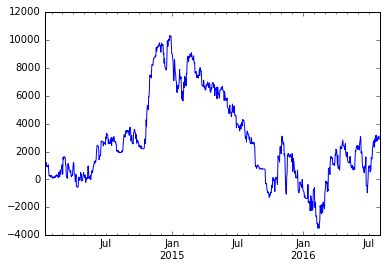

In [50]:
exo.plot()

In [51]:
df, exo_info = loaddata('/home/ubertrader/Downloads/strategy_210301.mat')

In [52]:
from scipy.io import loadmat, savemat
m = loadmat('/home/ubertrader/Downloads/strategy_210301.mat')

In [53]:
exo_info

{'legs': 2,
 'margin': 3850,
 'name': 'BullishCall',
 'pcf': array([0, 2], dtype=uint8),
 'pcfqty': array([1, 0], dtype=uint8),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

In [54]:
fut_price_mat = df['exo']

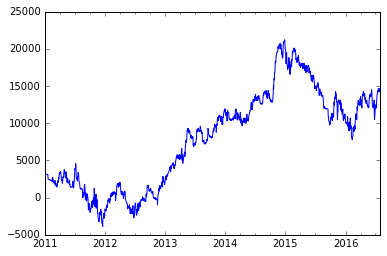

In [55]:
fut_price_mat.plot()

In [56]:
fut_mat_fitted = fut_price_mat.ix[exo.index[0]:exo.index[-1]]

In [57]:
fut_diff = fut_mat_fitted.diff().cumsum()
exo_diff = exo.diff().cumsum()

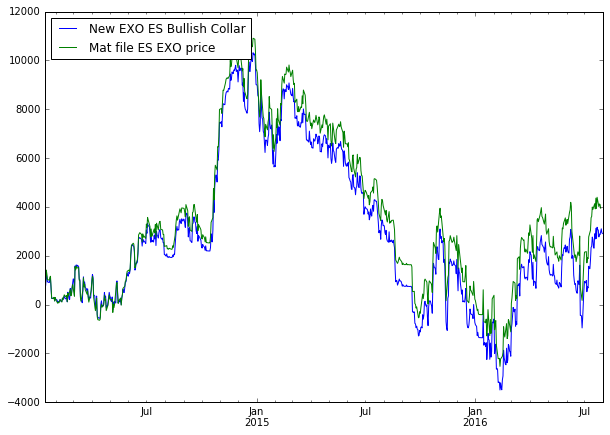

In [58]:
figsize(10, 7)
exo_diff.plot(label='New EXO ES Bullish Collar')
fut_diff.plot(label='Mat file ES EXO price')
legend(loc=2)


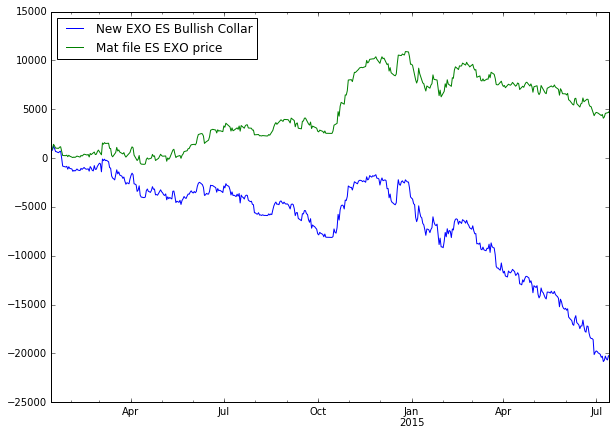

In [17]:
figsize(10, 7)
exo_diff.plot(label='New EXO ES Bullish Collar')
fut_diff.plot(label='Mat file ES EXO price')
legend(loc=2)

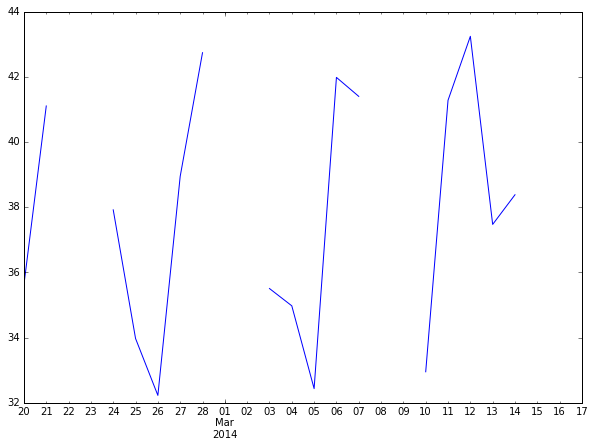

In [39]:
(exo_diff-fut_diff).ix['2014-02-20':'2014-03-17'].plot()

In [42]:
exo_diff.corr(fut_diff)

0.99860918831450374